In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[-0.74222055,  1.92447186],
       [ 2.86314265,  2.74655488],
       [-6.56708132, -1.6117522 ],
       ...,
       [-1.24694932,  2.61200851],
       [-0.39978192,  3.52155168],
       [-4.72976802, -2.25317017]], shape=(1000, 2))

In [4]:
y

array([2, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 1,
       1, 1, 0, 2, 1, 0, 1, 1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0,
       2, 0, 0, 2, 2, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 2, 1, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 1,
       2, 1, 1, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 1, 1, 0,
       0, 2, 0, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 2, 0, 1, 0, 0, 0, 2,
       1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1,
       2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1,

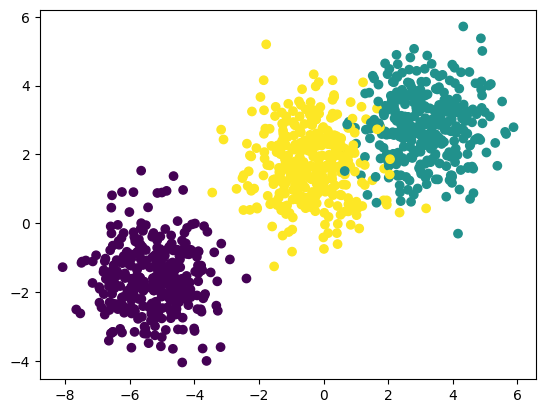

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)

In [8]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [11]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [15]:
from sklearn.cluster import KMeans

In [18]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [19]:
wcss

[1339.9999999999993,
 332.82398353122375,
 188.83353695359705,
 155.05768050348505,
 131.12103136445143,
 122.44147220670287,
 90.27047981953599,
 81.96294979947032,
 76.83596919275755,
 66.08767108574521]

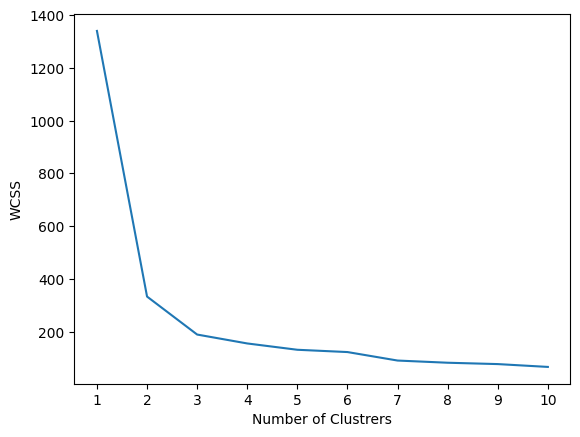

In [20]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [21]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [22]:
kmeans.fit_predict(X_train_scaled)

array([0, 0, 1, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 0, 2,
       2, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1,
       2, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2,
       1, 0, 1, 2, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 2, 0,
       1, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 1,
       1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 1, 1, 0, 1, 1,
       0, 2, 0, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0,
       2, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 0, 0,
       0, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 2,
       1, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2,
       0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 1, 0, 2, 2, 1, 0,
       0, 0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 0, 1,

In [23]:
y_pred=kmeans.predict(X_test_scaled)

In [24]:
y_pred

array([1, 0, 2, 0, 1, 2, 0, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2, 2, 1, 1,
       1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 2, 1, 0, 2, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0, 2, 1, 2, 1, 2, 2,
       0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0,
       1, 2, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0,
       2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 1, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0,
       0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0, 2, 0,
       2, 1, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0,

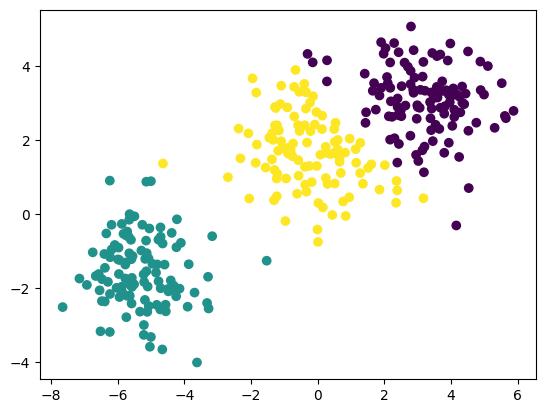

In [25]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [26]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [27]:
## kneelocator
!pip install kneed

In [28]:
from kneed import KneeLocator

In [29]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [30]:
kl.elbow

np.int64(3)

In [31]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [32]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [33]:
silhouette_coefficients

[np.float64(0.6496292043300128),
 np.float64(0.5351371418732921),
 np.float64(0.42808527220839165),
 np.float64(0.3808498038962823),
 np.float64(0.43056725455450096),
 np.float64(0.3544948059200209),
 np.float64(0.3501422237267203),
 np.float64(0.33317947729822783),
 np.float64(0.33907344851841537)]

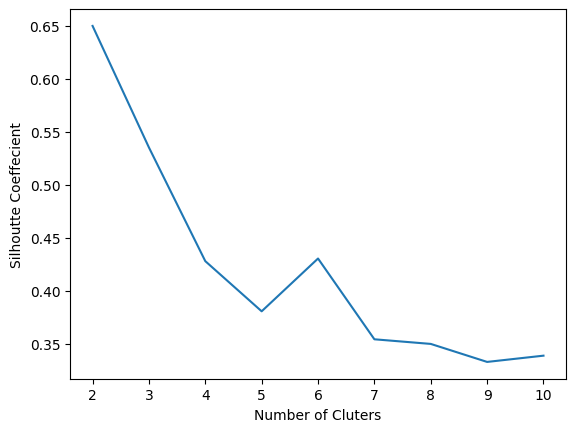

In [34]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()